In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('data/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.Sex = data.Sex.map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [6]:
X = data.drop(columns='Rings')
y = data.Rings

divider = KFold(5, shuffle=True, random_state=1)
scores = []

for i in range(1, 51):
    regr = RandomForestRegressor(n_estimators = i)
    score = sum(cross_val_score(regr, X, y, cv=divider.split(X,y), scoring='r2', n_jobs = -1))/5
    scores.append([score, i])

In [13]:
for sc in scores:
    print(sc)

[0.11617380888894102, 1]
[0.31690951124901734, 2]
[0.42047436292736473, 3]
[0.409444620971337, 4]
[0.4569044621187254, 5]
[0.4615499559094213, 6]
[0.4676247019092889, 7]
[0.4862528697734495, 8]
[0.4891267334586633, 9]
[0.4997711736247631, 10]
[0.50001451954491, 11]
[0.5016784350555428, 12]
[0.5109950312872314, 13]
[0.5157480817287743, 14]
[0.5041430197347332, 15]
[0.5100710392283785, 16]
[0.504474158305606, 17]
[0.515879634222943, 18]
[0.5147045918356351, 19]
[0.5151326919101024, 20]
[0.5188612178311335, 21]
[0.5288059605661146, 22]
[0.5198341999364525, 23]
[0.517455179736361, 24]
[0.5197500974172234, 25]
[0.5219813020872907, 26]
[0.5109818344161846, 27]
[0.5261755612993718, 28]
[0.5229862077260822, 29]
[0.5202963258720599, 30]
[0.5294139803662862, 31]
[0.5251870679133148, 32]
[0.5282216435825198, 33]
[0.5205048633163525, 34]
[0.5271998000616419, 35]
[0.525473535742837, 36]
[0.5197673501235525, 37]
[0.5290842572981594, 38]
[0.522079159972227, 39]
[0.5260430309865827, 40]
[0.53132272260

In [16]:
import numpy as np

print(np.shape(scores))

(50, 2)


[0.31690951124901734, 2] [0.11617380888894102, 1]


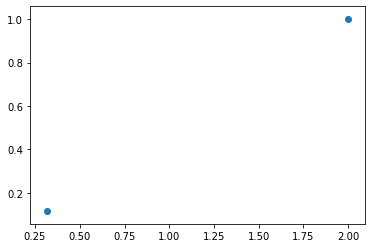

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

print(scores[:][1], scores[:][0])
plt.plot(scores[1], scores[0])